In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Exercise 1

In [2]:
def func(grid: np.ndarray | int | float):
    grid.resize(np.size(grid), 1)
    return np.sin(grid / 5) * np.exp(grid / 10) + 5 * np.exp(-1 * grid / 2)

In [3]:
def approx_func(weights: np.ndarray, grid: np.ndarray | int | float):
    weights.resize(np.size(weights))
    grid.resize(np.size(grid))
    size = np.size(weights)
    return weights@np.vander(grid, N=size)[:,::-1].T #without cycles ;)

In [4]:
def get_matrix_from_points(points: np.ndarray):
    points.resize(np.size(points))
    size = np.size(points)
    matrix = np.vander(points, N=size, increasing=True)
    return matrix

In [5]:
grid_for_graph = np.linspace(1, 15, 300)

## N1

In [6]:
points1 = np.array([1, 15])
matrix1 = get_matrix_from_points(points1)
weights1 = np.linalg.solve(matrix1, func(points1))

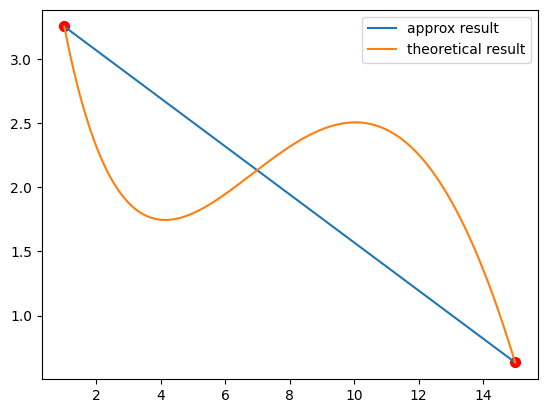

In [7]:
plt.plot(grid_for_graph, approx_func(weights1, grid_for_graph), label='approx result')
plt.plot(grid_for_graph, func(grid_for_graph), label='theoretical result')
plt.scatter(points1, func(points1), color='r', s=50)
plt.legend()

## N2

In [8]:
points2 = np.array([1, 8, 15])
matrix2 = get_matrix_from_points(points2)
weights2 = np.linalg.solve(matrix2, func(points2))

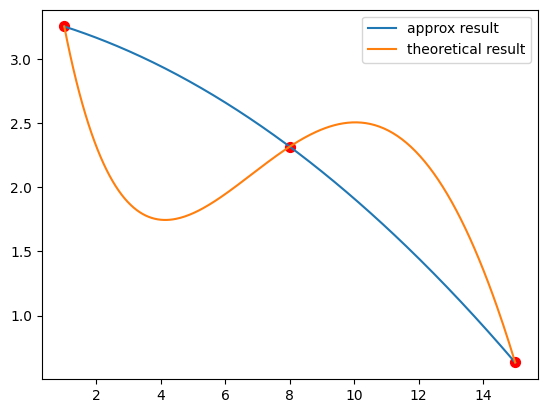

In [9]:
plt.plot(grid_for_graph, approx_func(weights2, grid_for_graph), label='approx result')
plt.plot(grid_for_graph, func(grid_for_graph), label='theoretical result')
plt.scatter(points2, func(points2), color='r', s=50)
plt.legend()

## N3

In [10]:
points3 = np.array([1, 4, 10, 15])
matrix3 = get_matrix_from_points(points3)
weights3 = np.linalg.solve(matrix3, func(points3))

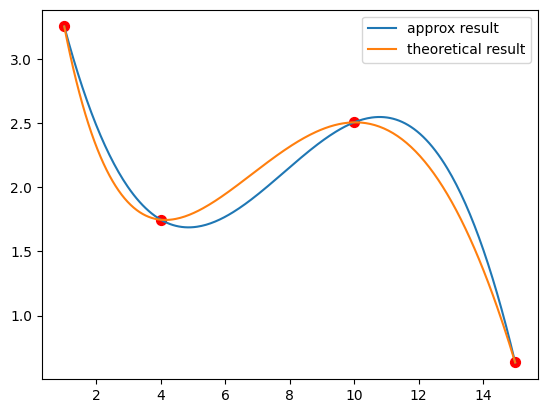

In [11]:
plt.plot(grid_for_graph, approx_func(weights3, grid_for_graph), label='approx result')
plt.plot(grid_for_graph, func(grid_for_graph), label='theoretical result')
plt.scatter(points3, func(points3), color='r', s=50)
plt.legend()

# Exercise 2

In [12]:
def exercise2(x: np.ndarray, y: np.ndarray):
    return f'Answer: {np.sum(x*y != 0)}, {np.sum(x+y != 0)}'

In [13]:
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])
exercise2(x, y)

'Answer: 2, 6'

# Exercise 3

In [14]:
def exercise3(x: np.ndarray, N: int):
    return f'Answer: {np.repeat(x, N)}'

In [15]:
x = np.array([1, 2, 0])
N = 3
exercise3(x, N)

'Answer: [1 1 1 2 2 2 0 0 0]'

# Exercise 4

In [16]:
def max_after_0(x: np.ndarray):
    index_after_0 = np.roll(x == 0, 1)
    numbers_after_0 = x[index_after_0][1:] #the 1st can't be right
    return f'Answer: {max(numbers_after_0)}'

In [17]:
x = np.array([27, 0, 11, 0, 0, -7, 2, 0, 4, 0])
max_after_0(x)

'Answer: 11'

# Exercise 5

In [18]:
def fill_0(x: np.ndarray):
    non_zero_val = x[np.nonzero(x)]
    indeces = np.cumsum(x != 0) - 1
    return f'Answer: {non_zero_val[indeces]}'

In [19]:
x = np.array([8, 0, 0, 1, 0, 0, 0, -17.5, 0])
fill_0(x)

'Answer: [  8.    8.    8.    1.    1.    1.    1.  -17.5 -17.5]'

# Exercise 6

In [20]:
def ln_taylor(x: int|float, N: int):
    n = np.arange(1, N+1)
    return np.sum((-1 * (-x)**n) / n)

In [21]:
ln_taylor(1, 100)

0.6881721793101955

# Задание 7

In [22]:
def my_mean(x: np.ndarray):
    return np.sum(x, axis=0) / np.shape(x)[0]

In [23]:
def my_cov(x: np.ndarray):
    delta_x = x - my_mean(x)
    return delta_x.T@delta_x / (np.shape(x)[0] - 1) #unbiased estimate

In [24]:
x = np.array([[175, 4], [20, 2], [25, 8]])
x

array([[175,   4],
       [ 20,   2],
       [ 25,   8]])

In [25]:
my_mean(x) - np.mean(x, axis=0)

array([0., 0.])

In [26]:
my_cov(x) - np.cov(x.T)

array([[0., 0.],
       [0., 0.]])